In [0]:
#!unzip "drive/My Drive/Titanic ML project/titanic.zip" -d "drive/My Drive/Titanic ML project/"

###Titanic ML Competition from Kaggle
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

* `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

* The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns we find in the `train.csv` data, we will predict whether the other 418 passengers on board (found in `test.csv`) survived.

### Preparing the workspace
* Import Pandas.
* Import numpy.
* Import matplotlib.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Getting data ready
* Read csv file 
* Visualize data to know it better

In [2]:
titanic_train = pd.read_csv("drive/My Drive/Titanic ML project/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


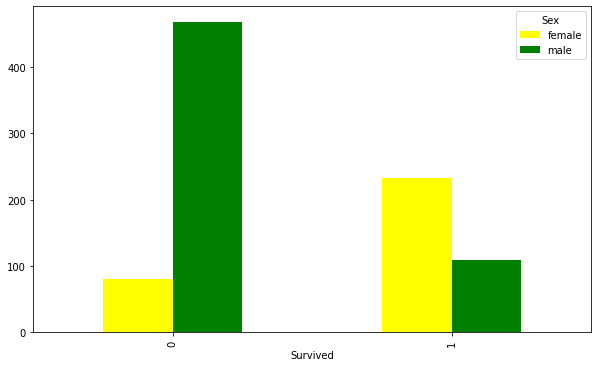

In [5]:
pd.crosstab(titanic_train.Survived, titanic_train.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["yellow", "green"]);

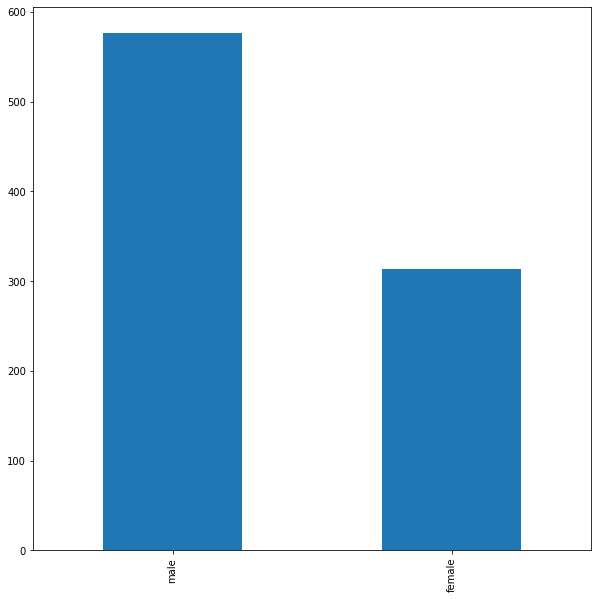

In [6]:
titanic_train.Sex.value_counts().plot.bar(figsize=(10, 10));

## Checking for null or empty data

In [7]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Deleting non relevant data
The Id, the number of Cabin and Ticket, value of fare, Name of passenger and where he/she have embarked are non relevant information for our analysis, since this kind of data would hardly change the outcome of a passenger. 

In [0]:
def drop_non_relevant_cols(df):
  return df.drop(["PassengerId", "Cabin","Ticket", "Fare", "Name", "Embarked"], axis=1)

In [9]:
titanic_train_new = drop_non_relevant_cols(titanic_train)
titanic_train_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [10]:
titanic_train_new.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [0]:

# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

In [0]:
# Define numeric features (only the Age column)
numeric_features = ["Age"]

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])

In [0]:
# Define different categorical features 
categorical_features = ["Sex"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

In [0]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)], remainder="passthrough")

In [0]:
X = titanic_train_new.drop("Survived", axis=1)
y = titanic_train_new["Survived"]

In [16]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

rfc_grid = {"model__n_estimators": np.arange(10, 100, 10),
            "model__criterion": ["entropy"],
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": np.arange(2, 30, 4),
            "model__min_samples_leaf": np.arange(1, 30, 5),
            "model__max_features": [1, "sqrt", "auto"],
            "model__max_samples": [500],
            "model__ccp_alpha": [0.0, 0.1, 0.5]}

# Create a model Pipeline with a preprocessor step and model step
model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                  ("model", rfc)])


In [18]:
%%time
# Setup grid hyperparameter search for RandomForestClassifier
gs_forest = GridSearchCV(model_pipeline,
                        param_grid=rfc_grid,
                        cv=5,
                        verbose=True)

# Fit the model Pipeline to the passengers training data
print(f"Fitting RandomForestClassifier...")
gs_forest.fit(X, y)


Fitting RandomForestClassifier...
Fitting 5 folds for each of 10206 candidates, totalling 51030 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 51030 out of 51030 | elapsed: 77.0min finished


CPU times: user 1h 16min 37s, sys: 17.5 s, total: 1h 16min 55s
Wall time: 1h 16min 58s


In [19]:
gs_forest.best_params_

{'model__ccp_alpha': 0.0,
 'model__criterion': 'entropy',
 'model__max_depth': 20,
 'model__max_features': 1,
 'model__max_samples': 500,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 6,
 'model__n_estimators': 80}

In [0]:
rfc_boost = RandomForestClassifier(ccp_alpha=0.0, criterion='entropy',
                                   max_depth=20, max_features=1,
                                   max_samples=500, min_samples_leaf=1,
                                   min_samples_split=6, n_estimators=80)

X_mod = preprocessor.fit_transform(X)
X_mod_df = pd.DataFrame(X_mod, columns=["Sex1", "Sex2", "Age", "Pclass", "SibSp", "Parch"])
rfc_fit = rfc_boost.fit(X_mod_df, y)

In [20]:
titanic_test = pd.read_csv("drive/My Drive/Titanic ML project/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
titanic_test_new = drop_non_relevant_cols(titanic_test)
titanic_test_new.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [0]:
test_mod = preprocessor.fit_transform(titanic_test_new)
test_mod_df = pd.DataFrame(test_mod, columns=["Sex1", "Sex2", "Age", "Pclass", "SibSp", "Parch"])
titanic_preds = rfc_fit.predict(test_mod_df)

In [49]:
titanic_preds[:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1])

In [50]:
df_preds = pd.DataFrame()
df_preds['PassengerId'] = titanic_test['PassengerId']
df_preds['Survived'] = titanic_preds
df_preds.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [0]:
df_preds.to_csv("drive/My Drive/Titanic ML project/titanic_predictions_grid_search_cv.csv", index=False)

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:590: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


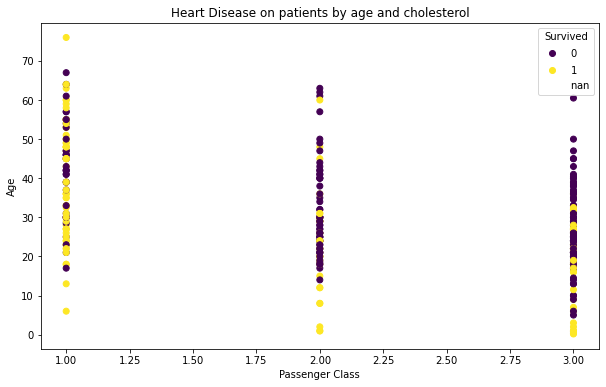

In [53]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(titanic_test_new["Pclass"], titanic_test_new["Age"], c=titanic_preds)

# Customize the plot
ax.set(title="Heart Disease on patients by age and cholesterol",
      xlabel="Passenger Class", ylabel="Age")
ax.legend(*scatter.legend_elements(), title="Survived");


In [57]:
rfc_fit.feature_importances_

array([0.17979506, 0.1616913 , 0.38063995, 0.15387883, 0.0695085 ,
       0.05448636])

In [58]:
# Match features to columns
features_dict = dict(zip(test_mod_df.columns, list(rfc_fit.feature_importances_)))
features_dict

{'Age': 0.3806399465728139,
 'Parch': 0.05448636271015815,
 'Pclass': 0.15387883310891642,
 'Sex1': 0.17979506382583418,
 'Sex2': 0.1616912960193235,
 'SibSp': 0.06950849776295402}

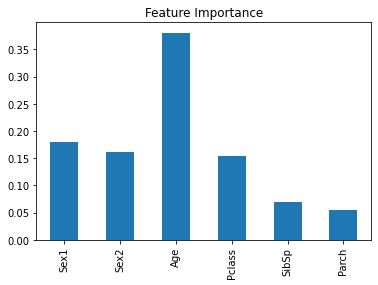

In [59]:

# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);